## Libraries Importing and Data Reading.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotnine import ggplot, aes, geom_point
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv(2).csv')

## Data Exploration and Analysis.

Inspecting the initial rows of the dataset to explore its contents.

In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,no


Viewing the size or structure of the dataset.

In [ ]:
df.shape

(41188, 11)

Data consists of **```41,118 rows```** and **```11 columns```**.

### **Dataset description :**

* **Age :** Represents the age of the client engaged in the marketing campaign.

*  **Job :** Indicates the profession or employment category of the client.

* **Marital :** Reflects the relationship status or marital situation of the client.

* **Education :** Represents the educational background or qualifications achieved by the client.

* **Default :** Specifies whether the client currently holds any default credit.
 * yes : has a deafault credit.
 * no : does'nt have a default credit.
 * unknown.

 * **Contact :** Represents the mode of communication employed to reach out to the client, which could be 'cellular' or 'telephone'.

 *  **Month :**Signifies the specific month during which the most recent contact with the client was initiated, denoted from January ('jan') to December ('dec').

* **Day_of_week :** Indicates the specific day of the week when the last interaction or contact with the client occurred, covering Monday ('mon') through Friday ('fri').

* **Housing :** Specifies whether the client currently holds a housing loan.
 * yes : has a housing loan.
 * no : does'nt have a housing loan.
 * unknown.

* **Loan :** Depicts whether the client possesses a personal loan, with available responses of 'yes', 'no', or 'unknown'.

* **Y (Target Feature) :** Signifies the success of the marketing effort by revealing whether the client opted for a term deposit, with responses of ***'yes'*** or ***'no'.***


---

Checking for columns datatypes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   default      41188 non-null  object
 5   housing      41188 non-null  object
 6   loan         41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  y            41188 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.5+ MB


**General Dataset Overview :**


* The dataset has various columns where most are recognized as 'object' data type, except for the 'age' column, which is represented as a numeric data type. There are no unexpected data types detected within the columns, and each column adheres to its expected data type specification.
* All columns appear to be complete, free from any missing or null values, ensuring a clean dataset without any data gaps.



Describing the statistical characteristics of the age column.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0


**Observations :**

* The dataset reveals that the mean age of customers is 40, indicating that the bank frequently engages with individuals in their middle age range.

* The age column encompasses a wide range, starting from a minimum of 17 and extending up to a maximum of 98, indicating a diverse age distribution among customers within this dataset.

* The statistical distribution of the age column appears to exhibit a very slight right skewness. This suggests that while most customers fall within the younger to middle-age bracket, there is a relatively smaller number of older customers.

Summary statistics describing the attributes of categorical columns.

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
y,41188,2,no,36548


**Job Availability :** There are 12 distinct job categories available, with 'admin' being the most frequent occupation among the bank's clients.

**Marital Status :** The majority of bank clients are married individuals.

**Education Levels:** A significant portion of clients holds university degrees.

**Credit Default :** Most clients do not have default credits.

**Loan Status :** A majority of clients do not have loans, but the majority has housing loans.

**Contact Method :** The primary contact method utilized is through cellular communication.

**Month of Contact :** May stands out as the most frequent month for offering the marketing plan to clients.

**Campaign Outcome :** The 'no' response is significantly more prevalent than 'yes' in the 'y' column, indicating a high rejection rate or the lack of success in the marketing campaign, with 'no' appearing around 87% more often than 'yes'

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

frames = []

for column in categorical_columns:
    unique_values = df[column].unique()
    # Create a DataFrame for each column's unique values
    temp_df = pd.DataFrame({'Column Name': column, 'Unique Values': [unique_values]})
    frames.append(temp_df)

# Concatenate all DataFrames in the list
unique_values_df = pd.concat(frames, ignore_index=True)
pd.set_option('display.max_colwidth', None)

display(unique_values_df)

,Column Name,Unique Values
0,job,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
1,marital,"[married, single, divorced, unknown]"
2,education,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
3,default,"[no, unknown, yes]"
4,housing,"[no, yes, unknown]"
5,loan,"[no, yes, unknown]"
6,contact,"[telephone, cellular]"
7,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
8,day_of_week,"[mon, tue, wed, thu, fri]"
9,y,"[no, yes]"


**Unique Values observations :**


* The categorical columns within the dataset predominantly feature logical classes that generally correspond to the expected categories for each column.

* Notably, there's a prevalent occurrence of the **'unknown'** category across multiple columns. This class represents missing or undefined data, making interpretation challenging. Decisions regarding the keeping or elimination of these entries will depend on subsequent analyses and their impact on maintaining the dataset's integrity.

In [ ]:
columns_of_interest = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

unknown_rows = df[df[columns_of_interest].apply(lambda row: 'unknown' in row.values, axis=1)]

print("Number of records containing 'unknown' values in all columns is : ",unknown_rows.shape[0])

Number of records containing 'unknown' values in each column is :  10700


* Total of  10,700 **unknown** entries presented in all columns, making up roughly 26% of the dataset, pose a challenge to manage individually across multiple columns. Various approaches may be necessary to address this significant volume of unidentified data.


---

Reviewing records containing the **'unknown'** class across multiple columns might lack insightfulness for model predictions, as having multiple unknown values in several columns for one client may not contribute significantly to the predictive capacity of the model.

In [ ]:
df[(df['job'] == 'unknown')  &
                     (df['education'] == 'unknown') &
                      (df['default'] == 'unknown') & (df['housing'] == 'unknown') &
                     (df['loan'] == 'unknown')]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
2723,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,no
21556,44,unknown,married,unknown,unknown,unknown,unknown,cellular,aug,tue,no


* There are 2 clients in the dataset whose data across all columns is labeled as 'unknown' and remains ungathered. This suggests that including these records in the marketing campaign might not offer substantial insight. Hence, we intend to remove these entries.

In [ ]:
df[(df['education']=='unknown')
& (df['job']=='unknown')
& (df['marital']=='unknown') & (df['default']=='unknown')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
17344,49,unknown,unknown,unknown,unknown,yes,yes,cellular,jul,mon,no
17421,55,unknown,unknown,unknown,unknown,yes,no,cellular,jul,mon,no


* Additionally, there are two more clients in the dataset who have 'unknown' entries for almost four different columns. Considering this, we are considering the potential removal of these entries as well.

In [ ]:
df.drop(index=[17344,17421,2723,21556],axis=0,inplace=True)

In [ ]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            326
Name: job, dtype: int64

* Within the bank dataset, there are 360 occurrences where the job information of the clients is labeled as 'unknown', indicating that their occupation details have not been identified or collected.

In [ ]:
fig = px.histogram(df, x='marital', color='marital', title='Count Plot for Default Column',
                   color_discrete_sequence=px.colors.qualitative.Light24_r)
fig.show()

* The majority of bank clients are married individuals.

* Additionally, a significant portion of clients are single.

* Specifically, there are approximately 80 instances where the marital status is unspecified or unreported.

To improve the dataset, one option is to remove these 80 of unknown records, keeping only data for individuals identified as married, single, or divorced.

In [ ]:
df = df[df['marital']!='unknown']

In [ ]:
fig = px.histogram(df, x='education', color='education', title='Count Plot for Education Column',
                   color_discrete_sequence=px.colors.qualitative.Plotly_r)
fig.show()

* The bank's client base predominantly consists of individuals with either University degrees or high school diplomas.

* Notably, those without any formal education represent a very small proportion, indicating that the bank's focus is not primarily directed towards individuals lacking degrees.

In [ ]:
df['education'].value_counts()

university.degree      12137
high.school             9501
basic.9y                6037
professional.course     5237
basic.4y                4170
basic.6y                2286
unknown                 1720
illiterate                18
Name: education, dtype: int64

* Moreover,there are 1731 occurrences in this dataset where the educational status of individuals has not been identified or specified.

In [ ]:
fig = px.histogram(df, x='default', color='default', title='Count Plot for Default Column',
                   color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

* In this bank dataset, over 30,000 clients do not have default credit records.

*  Conversely, only 3 clients within this dataset have default credit records.

* It's noteworthy that a substantial number, nearly 10,000 instances, contain unknown or unidentified data regarding default credit status.

In [ ]:
df['housing'].value_counts()

yes        21541
no         18578
unknown      987
Name: housing, dtype: int64

* Most of the bank clients have housing loans.

In [ ]:
df['loan'].value_counts()

no         33883
yes         6236
unknown      987
Name: loan, dtype: int64


* More than half of the clients in this dataset do not have any loans

In [ ]:
df['contact'].value_counts()

cellular     26090
telephone    15016
Name: contact, dtype: int64


* The majority of the customer contacts made during this marketing campaign were conducted via cellular communication.

In [ ]:
df['day_of_week'].value_counts()

thu    8599
mon    8495
wed    8119
tue    8078
fri    7815
Name: day_of_week, dtype: int64

In [ ]:
df['y'].value_counts()

no     36478
yes     4628
Name: y, dtype: int64

In [ ]:
fig = px.pie(df, names='y', title='Pie Chart for Target Column',
              color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

* Approximately 88.7% of the bank clients declined the term deposit offered during the marketing campaign, signifying a notable lack of success in this particular marketing endeavor. This outcome underscores the need for improvements in future campaigns.

Furthermore, this distribution reveals a substantial bias toward a specific class (0), indicating a potential requirement for additional measures such as upsampling to improve the model's performance.


In [ ]:
df['y'].value_counts()

no     36478
yes     4628
Name: y, dtype: int64

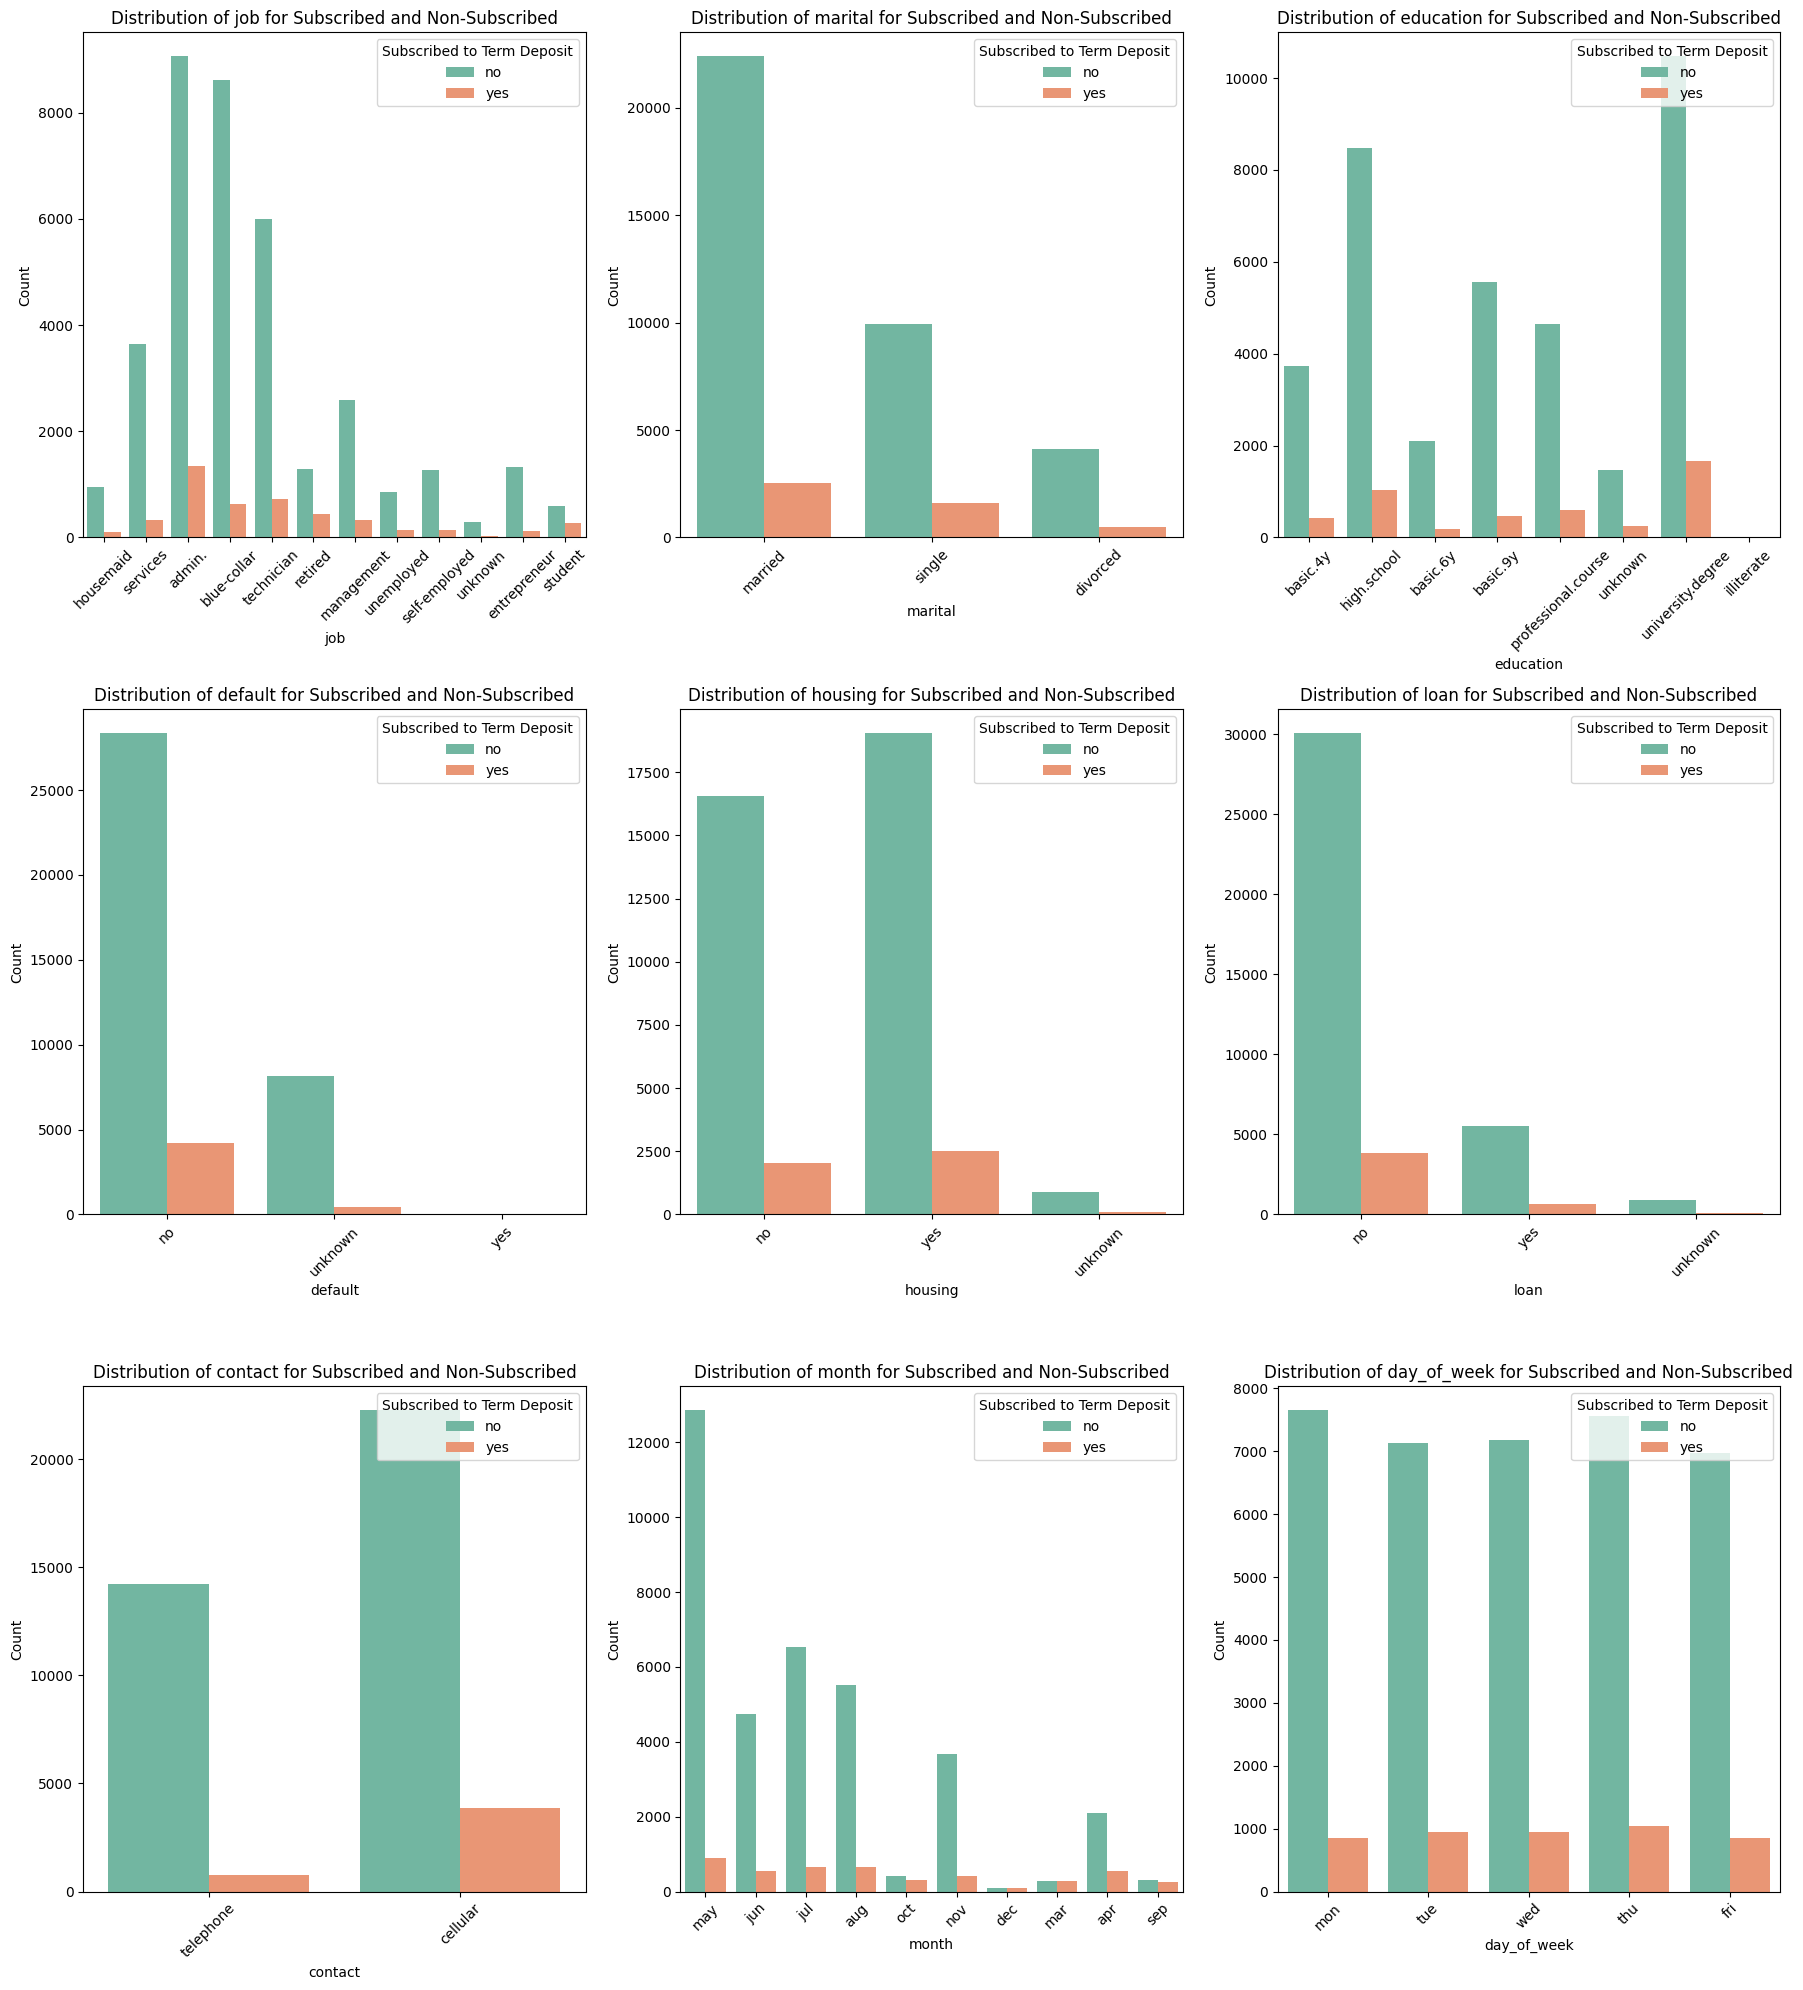

In [ ]:


# Create a list of columns except 'y' and 'age'
columns_to_plot = df.drop(['y', 'age'], axis=1).columns.tolist()

# Define the number of columns and rows for subplots
num_cols = 3  # Number of columns for subplots
num_rows = -(-len(columns_to_plot) // num_cols)  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 20))

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Iterate through columns and create count plots
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, hue='y', data=df, ax=axes[i // num_cols, i % num_cols],palette='Set2')
    axes[i // num_cols, i % num_cols].set_title(f'Distribution of {col} for Subscribed and Non-Subscribed')
    axes[i // num_cols, i % num_cols].set_xlabel(col)
    axes[i // num_cols, i % num_cols].set_ylabel('Count')
    axes[i // num_cols, i % num_cols].legend(title='Subscribed to Term Deposit', loc='upper right')
    axes[i // num_cols, i % num_cols].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


* The "Day of the Week" column doesn't appear to influence the acceptance or rejection of the offer provided.
* However, the majority of other columns demonstrate notable impacts on the acceptance and rejection rates.
* Married individuals exhibit a higher tendency to subscribe compared to singles and divorced individuals.
* Those with job titles classified as administrators display a greater likelihood of subscribing to this offer.
* Communicating with people via cellular contact notably improved and increased the number of subscriptions.





## Data Preprocessing.

### **Nulls Checking.**

In [ ]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
y              0
dtype: int64

As observed earlier, the dataset is clean with no instances of missing values or null entries.

-----

### **Duplicates Checking.**

In [ ]:
df.duplicated().sum()

7057

A considerable number of duplicates have been found in the dataset, suggesting that multiple customers might have been contacted repeatedly during the marketing campaign.

Checking the percentage of duplicates within data

In [ ]:
duplicate_ratio =  df.duplicated().sum() / len(df)
print("Duplicates percenatage :", duplicate_ratio*100)


Duplicates percenatage : 17.167810052060524


In [ ]:
df[df.duplicated(keep=False)].head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,no
11,25,services,single,high.school,no,yes,no,telephone,may,mon,no
14,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,no
16,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,no
21,55,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,mon,no


* Upon identifying these duplicates, it's apparent that they belong to the same customers with identical attributes. This observation potentially confirms that the bank contacted certain customers multiple times during the marketing campaign.

While these duplicates don't appear to be data errors, their presence constitutes a large portion of the dataset. This prevalence could bias the model towards these duplicates and potentially result in overfitting issues.

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
print("Number of rows after dropping duplicates : ",df.shape[0])

Number of rows after dropping duplicates :  34049


Inspecting the value counts of the target feature following the removal of duplicates.

In [ ]:
df['y'].value_counts()

no     29687
yes     4362
Name: y, dtype: int64

* It seems that a significant number of duplicates or repeatedly contacted customers primarily belonged to the clients who didn't accept the term deposit during the marketing campaign. This deduction is based on the noticeable decrease in the count of the 'no' class, indicating that repeated contact through marketing might substantially influence the acceptance or rejection of the offer.

----

### **Outliers and Skewness.**

Verifying the presence of outliers within the **```Age```** column.

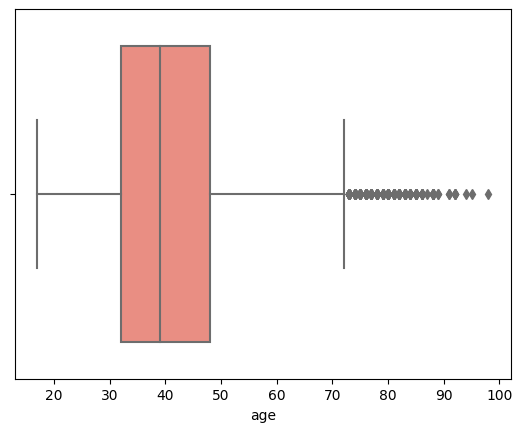

In [ ]:
sns.boxplot(df,x='age',color ='salmon' )
plt.show()

* A few outliers have been detected, which is expected considering the variability in ages. Additionally, as previously noted, the column displays a slight right skewness. Let's delve into further analysis and explore potential transformations to address this skewness.

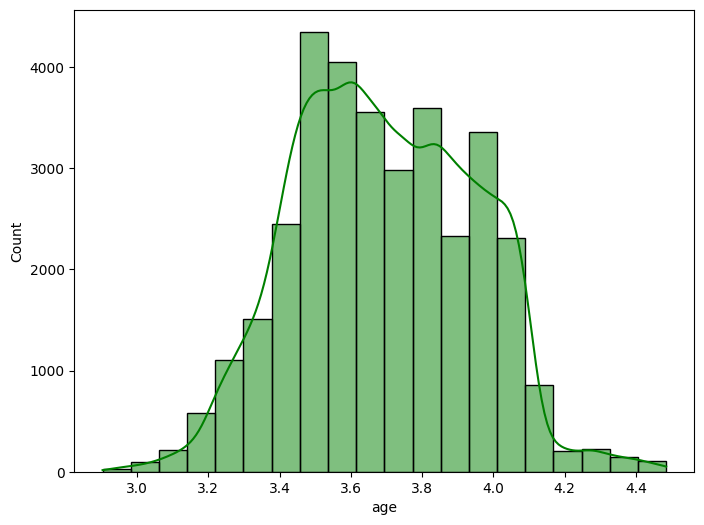

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df,x=df['age'],kde=True,color='green',bins=20)
plt.show()

* The distribution of the column confirms a distinct right skewness, emphasizing that a significant portion of the bank's customers lie within the age range of 30 to 60 and the noticeable number of outliers present within this column.

Determining the count and percentage of outliers within the column

In [ ]:
def find_outliers(df):

  q1=df.quantile(0.25)

  q3=df.quantile(0.75)

  IQR=q3-q1

  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

  return outliers

In [ ]:
outliers = find_outliers(df['age'])
print("Number of outliers in Age ",":", str(len(outliers)),", Percentage is : ",str(len(outliers)*100/len(df)),"%")
print("\n")

Number of outliers in Age  : 309 , Percentage is :  0.9075156392258216 %




Before moving for handling these outliers,where their percentage is very small,we will address some transformation methods to handle right skewness,that might signifcantly contribute in lowering number of outliers

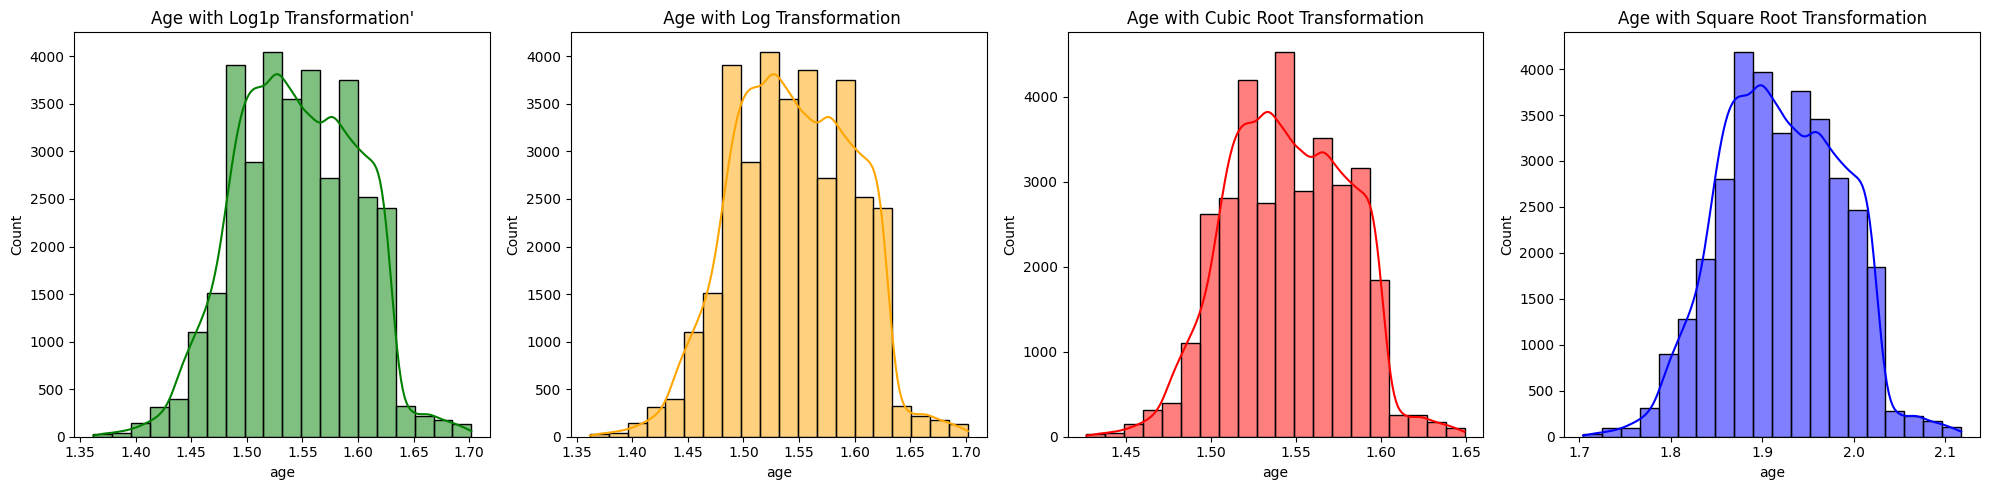

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 grid of subplots

    # Log1p Transformation
sns.histplot(np.log1p(df['age']), color='green', ax=axes[0],kde=True,bins=20)
axes[0].set_title("Age with Log1p Transformation'")

    # Log Transformation
sns.histplot(np.log(df['age'] + 1), color='orange', ax=axes[1],kde=True,bins=20)
axes[1].set_title(" Age with Log Transformation")

    # Cubic Root Transformation
sns.histplot(np.cbrt(df['age']), color='red', ax=axes[2],kde=True,bins=20)
axes[2].set_title("Age with Cubic Root Transformation")

    # Square Root Transformation
sns.histplot(np.sqrt(df['age']), color='blue', ax=axes[3],kde=True,bins=20)
axes[3].set_title("Age with Square Root Transformation")

plt.tight_layout()
plt.show()


* Log and Log1p transformation methods appear to be the most appropriate approaches for managing the right skewness presented in the column.

In [ ]:
df['age'] = np.log1p(df['age'])

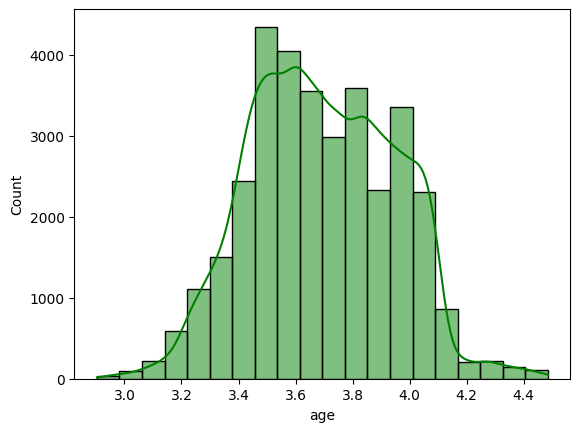

In [ ]:
sns.histplot(df,x=df['age'],kde=True,color='green',bins=20)
plt.show()

In [ ]:
outliers = find_outliers(df['age'])
print("Number of outliers in Age ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
print("\n")

Number of outliers in Age  : 28 ,It's Percentage is :  0.08223442685541425 %




Following the application of the log transformation, the number of outliers has notably decreased. To further address this issue, we will replace the remaining 28 outliers with the upper and lower limits of the column.

In [ ]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df = remove_outliers(df, 'age')


In [ ]:
outliers = find_outliers(df['age'])
print("Number of outliers in Age ",":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
print("\n")

Number of outliers in Age  : 0 ,It's Percentage is :  0.0 %




-----

### **Encoding.**

We have 9 categorical columns, excluding the target feature, each containing different numbers of categories. Some columns exhibit an inherent order, while others do not.

We'll apply different encoding techniques suited to the nature of each column.

In [ ]:
print("Number of columns in our dataset before encoding : ",df.shape[1])

Number of columns in our dataset before encoding :  11


In [ ]:
for col in df.select_dtypes(include=['object']):
  print("Number of unique categories in column  ", col," is : ", df[col].nunique())
  print("\n")

Number of unique categories in column   job  is :  12


Number of unique categories in column   marital  is :  3


Number of unique categories in column   education  is :  8


Number of unique categories in column   default  is :  3


Number of unique categories in column   housing  is :  3


Number of unique categories in column   loan  is :  3


Number of unique categories in column   contact  is :  2


Number of unique categories in column   month  is :  10


Number of unique categories in column   day_of_week  is :  5


Number of unique categories in column   y  is :  2




In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

-----

1. For the target feature, we'll map the label **yes**, indicating acceptance of a term deposit, to **1**, while mapping **no** to **0**.

In [ ]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df['y'].value_counts()

0    29687
1     4362
Name: y, dtype: int64

-----

2. Considering the **`education`** column's ordinal nature, we will utilize **ordinal** **encoding** to convert it, designating the 'unknown' category as -1.

In [ ]:
print(" Education categories before applying Ordinal encoding : \n",df['education'].unique())

 Education categories before applying Ordinal encoding : 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [ ]:
ordinal_encoder = OrdinalEncoder()

df['education'] = ordinal_encoder.fit_transform(df[['education']])

In [ ]:
print("Education categories after applying Ordinal encoding : \n",df['education'].unique())

Education categories after applying Ordinal encoding : 
 [0. 3. 1. 2. 5. 7. 6. 4.]


In [ ]:
df['education']=df['education'].replace(7,-1)

In [ ]:
df['education'].unique()

array([ 0.,  3.,  1.,  2.,  5., -1.,  6.,  4.])

-----

3. Given that the '**`marital`**' and '**`contact`**' columns have a small number of unordered categories, one-hot encoding can be applied to these columns.

In [ ]:
df = pd.get_dummies(data = df,columns=['contact','marital'])

-----

4. For the '**`Job`**' and '**`Day of Week`**' columns, due to their large number of distinct categories and lack of inherent order, one-hot encoding might not be an efficient approach. Instead, we'll use **label encoding** to assign a numerical value to each category in these columns.  
   * Additionally, for the '**`Job`**' column, we'll convert the 'unknown' category to -1 before applying label encoding to distinguish it from the other categories.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['job'] = df['job'].astype(str).replace('unknown', '-1')

In [ ]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', '-1',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
df['job'] = label_encoder.fit_transform(df['job'])

In [ ]:
df['job'].unique()

array([ 4,  8,  1,  2, 10,  6,  5, 11,  7,  0,  3,  9])

In [ ]:
df['job'] = df['job'].replace(0, -1)

In [ ]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])

----

5. For the '**`Month`**' column, we intend to map each month name to its respective month number.

In [ ]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Encode the 'Month' column based on the dictionary mapping
df['month'] = df['month'].map(month_mapping)

In [ ]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9])

----

6. For the columns with boolean categories (**'Loan', 'Housing', 'Default'**), containing labels 'Yes', 'No', and 'Unknown', our strategy involves mapping 'Yes' to 1, 'No' to 0, and assigning -1 to 'Unknown' to denote lower importance.

In [ ]:
df['housing'] = df['housing'].map({'yes': 1,'unknown': -1,'no': 0})

df['loan'] = df['loan'].map({'yes': 1,'unknown': -1,'no': 0})

df['default'] = df['default'].map({'yes': 1,'unknown': -1,'no': 0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34049 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                34049 non-null  float64
 1   job                34049 non-null  int64  
 2   education          34049 non-null  float64
 3   default            34049 non-null  int64  
 4   housing            34049 non-null  int64  
 5   loan               34049 non-null  int64  
 6   month              34049 non-null  int64  
 7   day_of_week        34049 non-null  int64  
 8   y                  34049 non-null  int64  
 9   contact_cellular   34049 non-null  uint8  
 10  contact_telephone  34049 non-null  uint8  
 11  marital_divorced   34049 non-null  uint8  
 12  marital_married    34049 non-null  uint8  
 13  marital_single     34049 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 2.8 MB


* Now that all columns have been transformed into a numeric format, we can proceed with the subsequent steps in data preparation for modeling.

In [ ]:
print("Number of columns after encoding : ",df.shape[1])

Number of columns after encoding :  14


----

### **Feature Selection.**

Implementing various feature selection techniques to ascertain that the chosen features provided to the model offer valuable and meaningful insights.


In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
X = df.drop(['y'],axis=1)
y =df.y

#### 1. Correlation.

Determining the correlation values between the features and the target variable to identify features that display substantial positive or negative correlations with our target.

In [ ]:
correlation = df.corr()[['y']].sort_values(by='y', ascending=False)
display(correlation)

,y
y,1.000000
contact_cellular,0.163167
default,0.111287
marital_single,0.057834
education,0.049477
month,0.043631
job,0.020268
housing,0.017590
day_of_week,0.017212
age,-0.005774


* Features like 'contact_cellular', 'default', 'marital_single', 'education', 'month', 'job', 'housing', and 'day_of_week' exhibit positive correlations with the target 'y'. Among these, 'contact_cellular' and 'default' display the strongest positive correlations.

* Features such as 'age', 'loan', 'marital_divorced', 'marital_married', and 'contact_telephone' showcase negative correlations with the target 'y'. The features 'contact_telephone' and 'marital_married' demonstrate the strongest negative correlations.

Creating a bar plot to visually represent the correlations between the features and the target variable, facilitating the assessment and selection of features based on their correlation strengths.

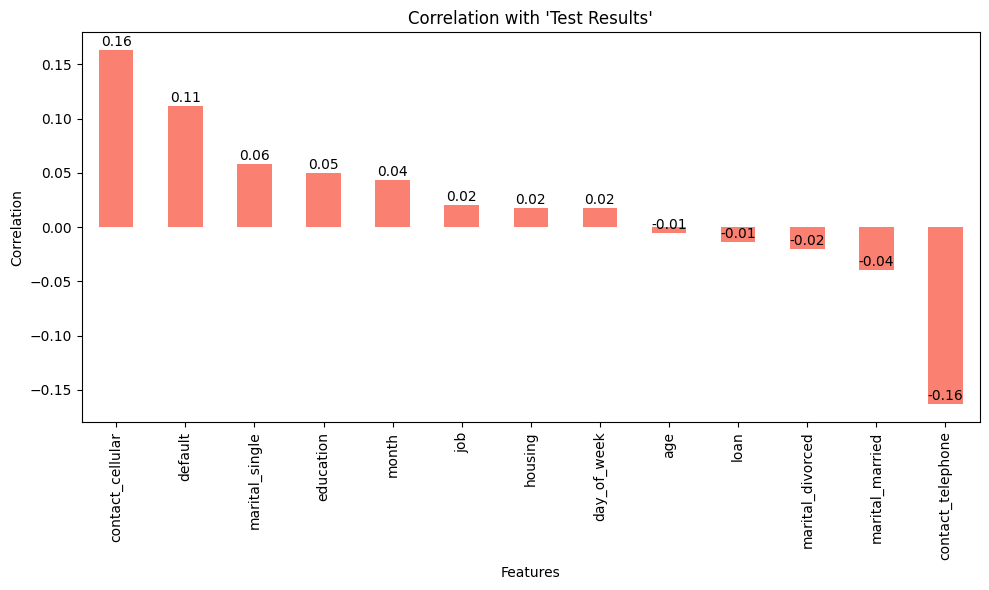

In [ ]:
correlations = df.corr()['y'].drop('y')
sorted_correlations = correlations.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sorted_correlations.plot(kind='bar', color='salmon')
plt.title("Correlation with 'Test Results'")
plt.xlabel('Features')
plt.ylabel('Correlation')

for i, v in enumerate(sorted_correlations):
    ax.text(i, v + 0.001, f'{v:.2f}', ha='center', va='bottom',color='black')

plt.tight_layout()
plt.show()


* Following our correlation analysis, it's apparent that certain columns, like '**`age`**' and '**`day of the week`**,' display correlation values close to zero concerning the target variable. This indicates a minimal effect of these columns on the target, raising doubts about their suitability for inclusion in the model.
Our primary focus is on including features that show notable positive or negative correlations with the target variable. To further strengthen our selection process, we aim to utilize additional feature selection techniques.


#### 2. Mutual Information.

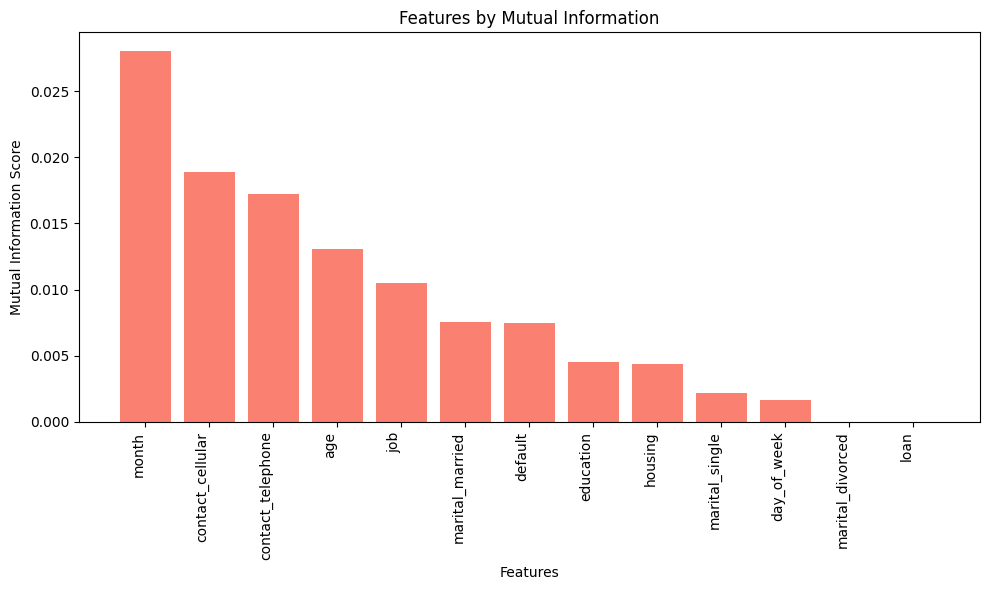

In [ ]:
mutual_info_scores = mutual_info_classif(df.drop(['y'],axis=1), df['y'],random_state=1)

top_indices = np.argsort(mutual_info_scores)[::-1]


plt.figure(figsize=(10, 6))
plt.bar(df.drop(['y'],axis=1).columns[top_indices], mutual_info_scores[top_indices], color='salmon')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Features by Mutual Information')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#### 3. Selecting k best features based on ANOVA.

In [ ]:
# Create SelectKBest object with the desired scoring function and value of k
k = 10
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to your data
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Map selected feature indices to their respective names
selected_features = X.columns[selected_indices]  # Assuming X is a DataFrame

# Print the names of the selected features
print("Selected features:")
print(selected_features)


Selected features:
Index(['job', 'education', 'default', 'housing', 'month', 'contact_cellular',
       'contact_telephone', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')


Following the analysis from various feature selection techniques including correlation, mutual information, and ANOVA statistics, our objective is to identify and select the features that appear consistently across all these methodologies. This selection process aims to retain the most informative relationships between the target variable and features.

**These are the selected features :**

* Job
* Education
* Default
* Housing
* Contact
* Marital
* Month

-----

### **Fearure Scaling.**

Implementing standardization across the features to ensure uniform scaling of all of them, thereby enhancing the model's performance and accuracy during the learning process.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()

df_scaled=df.copy()
columns = df.drop(['y'],axis=1).columns
for col in columns:
    df_scaled[col] = standard_scaler.fit_transform(np.array(df_scaled[col]).reshape(-1,1))


In [ ]:
df_scaled.head()

,age,job,education,default,housing,loan,month,day_of_week,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single
0,1.388337,-0.198951,-1.498001,0.530913,-0.882877,-0.341022,-0.776462,-0.708818,0,-1.26176,1.26176,-0.371588,0.810833,-0.616405
1,1.457399,0.927106,-0.154916,-1.881614,-0.882877,-0.341022,-0.776462,-0.708818,0,-1.26176,1.26176,-0.371588,0.810833,-0.616405
2,-0.221756,0.927106,-0.154916,0.530913,0.924112,-0.341022,-0.776462,-0.708818,0,-1.26176,1.26176,-0.371588,0.810833,-0.616405
3,0.079982,-1.043493,-1.050306,0.530913,-0.882877,-0.341022,-0.776462,-0.708818,0,-1.26176,1.26176,-0.371588,0.810833,-0.616405
4,1.388337,0.927106,-0.154916,0.530913,-0.882877,2.014723,-0.776462,-0.708818,0,-1.26176,1.26176,-0.371588,0.810833,-0.616405


----

Generating a feature dataset consisting of the chosen features for model input, and setting up the target label variable 'y'.

In [ ]:
X = df_scaled.drop(['y','age','loan','day_of_week'],axis=1)
y = df_scaled.y

In [ ]:
X.head()

,job,education,default,housing,month,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single
0,-0.198951,-1.498001,0.530913,-0.882877,-0.776462,-1.26176,1.26176,-0.371588,0.810833,-0.616405
1,0.927106,-0.154916,-1.881614,-0.882877,-0.776462,-1.26176,1.26176,-0.371588,0.810833,-0.616405
2,0.927106,-0.154916,0.530913,0.924112,-0.776462,-1.26176,1.26176,-0.371588,0.810833,-0.616405
3,-1.043493,-1.050306,0.530913,-0.882877,-0.776462,-1.26176,1.26176,-0.371588,0.810833,-0.616405
4,0.927106,-0.154916,0.530913,-0.882877,-0.776462,-1.26176,1.26176,-0.371588,0.810833,-0.616405


In [ ]:
X.shape

(34049, 10)

In [ ]:
X.columns

Index(['job', 'education', 'default', 'housing', 'month', 'contact_cellular',
       'contact_telephone', 'marital_divorced', 'marital_married',
       'marital_single'],
      dtype='object')

----

## Modeling Phase.

We aim to apply various models to this dataset to attain a generalized, unbiased model that offers high accuracy, minimized mispredictions, and strong adaptability to new data.

### **Importing all necessary modules for various machine learning models, hyperparameter tuning, and evaluation metrics**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint, uniform
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, f1_score

### **Upsampling.**

In [ ]:
y.value_counts()

0    29687
1     4362
Name: y, dtype: int64

The observed imbalance in our target feature highlights the need to employ upsampling techniques. This step is essential to counteract class imbalance, ensuring greater reliability in our models and preventing biases favoring the majority class for more accurate predictions.

Splitting our features and target datasets to training and testing sets with 70% for training and 30% on testing.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

# Calculate the ratio between the two classes
class_ratio = class_0_count / class_1_count if class_1_count != 0 else np.inf

print(f"Class 0 count: {class_0_count}")
print(f"Class 1 count: {class_1_count}")
print(f"Ratio (Class 0 : Class 1): {class_ratio:.2f}")


Class 0 count: 20754
Class 1 count: 3080
Ratio (Class 0 : Class 1): 6.74


Using **SMOTE-ENN**, oversample the minority class (**Class** 1) while employing Edited Nearest Neighbors (ENN) to refine the dataset by eliminating noise and misclassifications, aiming to improve the quality of minority class oversampling.


In [ ]:
enn_params = {'n_neighbors': 3, 'kind_sel': 'all'}
enn = EditedNearestNeighbours(**enn_params)

smote_enn = SMOTEENN(random_state=42,sampling_strategy=0.7, enn=enn)
x_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

In [ ]:
print("Before UpSampling, counts of class '0': {}".format(sum(y_train==0)))
print("Before UpSampling, counts of class '1': {} \n".format(sum(y_train==1)))


print("After UpSampling, counts of class '0': {}".format(sum(y_resampled==0)))
print("After UpSampling, counts of class '1': {} \n".format(sum(y_resampled==1)))

Before UpSampling, counts of class '0': 20754
Before UpSampling, counts of class '1': 3080 

After UpSampling, counts of class '0': 14531
After UpSampling, counts of class '1': 14527 



* Our training data now displays an equal distribution among target class values, effectively addressing class imbalance. This ensures that the models receive balanced data, mitigating bias towards any majority class.

Determining the number of training examples the model will be trained on.




In [ ]:
print("Number of Training samples : ",x_train.shape[0])

Number of Training samples :  23834


Determining the number of testing examples the model will be evaluated on.




In [ ]:
print("Number of Testing samples : ",x_test.shape[0])

Number of Testing samples :  10215



The dataset is now prepared for feeding into multiple models for evaluation, enabling the selection of the most suitable model for our data.

-------

###  **1. Logistic Regression.**


Using the logistic regression model as the primary option among classification models to assess its performance on the dataset and evaluate the necessity for applying further algorithms.

*  Training a logistic regression model on the upsampled data.

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_resampled,y_resampled)

LogisticRegression()

Generating predictions from the model for the  model evaluation.

In [ ]:
y_pred_test = model.predict(x_test)

y_pred_train = model.predict(x_resampled)


Generating the confusion matrix of the model to assess its performance and ascertain the count of mispredictions made by the model.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,4739,4194
Actual Positive,306,976


* **True Negatives (0)**: 4739 instances correctly predicted as negative  while 4194 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 976 instances correctly predicted as positive  and 306 instances were wrongly predicted as negative (False Negatives).

The confusion matrix reveals strong predictions for instances of class 1, but it misclassifies approximately half of the instances belonging to class 0. To validate these findings, a detailed analysis of the Classification Report will be performed.


Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.53      0.68      8933
           1       0.19      0.76      0.30      1282

    accuracy                           0.56     10215
   macro avg       0.56      0.65      0.49     10215
weighted avg       0.85      0.56      0.63     10215



* **(Class 1)** has relatively high recall (76%) for the  , indicating it can effectively predict a significant portion of the actual positive entries.

* Additionally, for**(Class 1)** a precision of 19% signifies a considerable proportion of false positives among the predicted positive instances. This observation might be influenced by the smaller number of entries used for testing (1282 entries).

* The model shows a decent balance between precision and recall for the negative class **(Class 0)** but could benefit from improved precision.
Overall, while the model exhibits strength in identifying positive instances, there is a need to reduce false positives to enhance its predictive performance.

Plotting the ROC curve aids in identifying the optimal threshold that achieves a balance between true positive and false positive rates, facilitating better decision-making for model threshold selection.

In [ ]:
y_probs = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

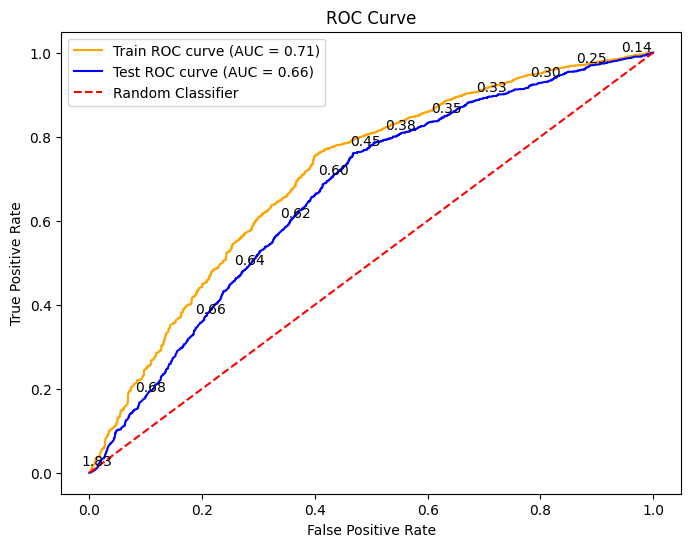

In [ ]:
# Get the predicted probabilities for the positive class (class 1)
train_probs = model.predict_proba(x_resampled)[:, 1]
test_probs = model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_resampled, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate the ROC curve for test set
fpr_test, tpr_test,thresholds_test = roc_curve(y_test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train,color='orange', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='blue',label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

for i, threshold in enumerate(thresholds_test):
    if i % 200 == 0:  # Display a subset of thresholds for better readability
        plt.annotate(f'{threshold:.2f}', (fpr_test[i], tpr_test[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Adjusting the threshold value of Logistic Regression based on the observed ROC curve.

In [ ]:
threshold= 0.63
test_prob=model.predict_proba(x_test)

predicted_labels = (test_prob[:, 1] >= threshold).astype(int)

Reassessing the confusion matrix of the Logistic Regression model with the adjusted threshold to determine if any alterations have occurred.

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,6245,2688
Actual Positive,612,670


* **True Negatives (0)**: 6245 instances correctly predicted as negative  while 2688 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 670 instances correctly predicted as positive  and 612 instances were wrongly predicted as negative (False Negatives).

After adjusting the threshold, a notable reduction in false positives for class 0 was observed, although there was a corresponding increase in false negatives. To confirm these observations, a detailed analysis using the classification report is recommended.


Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print("Classification Report : \n" ,classification_report(y_test, predicted_labels))

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      8933
           1       0.20      0.52      0.29      1282

    accuracy                           0.68     10215
   macro avg       0.56      0.61      0.54     10215
weighted avg       0.82      0.68      0.73     10215



Upon analyzing the classification report subsequent to the threshold adjustment in logistic regression, notable enhancements are observed across recall, precision, and f1-score metrics for class 0. These improvements bring them closer in alignment to the metrics observed for class 1, reflecting a more balanced performance between the two classes. This optimization demonstrates a reduction in false positives while also addressing false negatives.

However, there remains potential for further improvement in these predictions through the exploration of alternative models and methodologies.






---

* Employing an additional logistic regression by modifying class weight parameters in an attempt to reduce and manage the frequency of mispredictions, aiming for an improved predictive outcome.


Generating a logistic regression model instance with adjusted class weight parameters, emphasizing higher weight for the minority class (class 1), and training it on the imbalanced dataset to assess its performance.

In [ ]:
class_weights = {0: 1, 1: 5}
logistic_regression_model = LogisticRegression(class_weight=class_weights)

In [ ]:
logistic_regression_model.fit(x_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 5})

In [ ]:
y_pred_test = logistic_regression_model.predict(x_test)

y_pred_train = logistic_regression_model.predict(x_train)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,5208,3725
Actual Positive,384,898


* **True Negatives (0)**: 5208 instances correctly predicted as negative  while 3725 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 898 instances correctly predicted as positive  and 384 instances were wrongly predicted as negative (False Negatives).


The confusion matrix highlights superior performance for instances of class 1, although it's not optimal for class 0, showing promising potential. To further validate these findings, we'll generate a classification report and fine-tune the threshold for confirmation.







Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_test))

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.58      0.72      8933
           1       0.19      0.70      0.30      1282

    accuracy                           0.60     10215
   macro avg       0.56      0.64      0.51     10215
weighted avg       0.84      0.60      0.67     10215



* The model demonstrates notably higher recall for class 1, meaning it performs better at identifying actual positive instances but with a lower precision.
* However, precision for class 0 is considerably higher than for class 1, while the recall for class 0 is lower. This suggests that while the model is good at precision for the negative class, it tends to miss several actual negative instances.
* Overall, the model's performance is moderately accurate but lacks balance in correctly predicting both classes, requiring improvement in precision and recall for a more balanced outcome.

Plotting the ROC curve aids in identifying the optimal threshold that achieves a balance between true positive and false positive rates, facilitating better decision-making for model threshold selection.

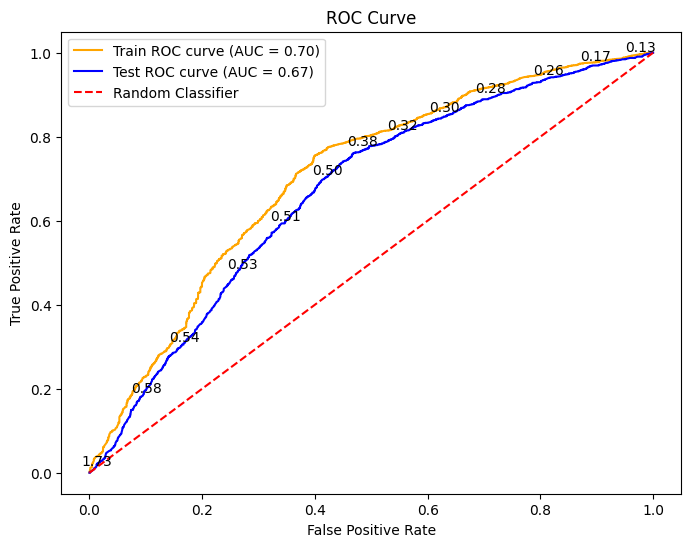

In [ ]:
# Get the predicted probabilities for the positive class (class 1)
train_probs = logistic_regression_model.predict_proba(x_resampled)[:, 1]
test_probs = logistic_regression_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_resampled, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate the ROC curve for test set
fpr_test, tpr_test,thresholds_test = roc_curve(y_test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve for training set
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train,color='orange', label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
# Plot ROC curve for test set
plt.plot(fpr_test, tpr_test, color='blue',label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')

for i, threshold in enumerate(thresholds_test):
    if i % 200 == 0:  # Display a subset of thresholds for better readability
        plt.annotate(f'{threshold:.2f}', (fpr_test[i], tpr_test[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Adjusting the threshold of the logistic regression model and re-evaluating its performance after the adjustment.






In [ ]:
threshold= 0.52
test_prob=logistic_regression_model.predict_proba(x_test)

predicted_labels = (test_prob[:, 1] >= threshold).astype(int)


In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,6303,2630
Actual Positive,605,677


* **True Negatives (0)**: 6303 instances correctly predicted as negative  while 2630 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 677 instances correctly predicted as positive  and 384 instances were wrongly predicted as negative (False Negatives).


Post adjustment threshold for the adjusted class weight logistic regression confusion matrix shows potetntailly better predictions for both classes than the logistic model trained on the resampled data,showing a good predictions for class 0,reasnoable but not very reliable predictions regarding class 1,that might need improvment to reduce these number of false positives.








Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print("Classification Report : \n" ,classification_report(y_test, predicted_labels))

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.64      0.76      8933
           1       0.20      0.61      0.30      1282

    accuracy                           0.64     10215
   macro avg       0.56      0.63      0.53     10215
weighted avg       0.83      0.64      0.70     10215



* The model displays a comparable identification rate for instances of both classes, indicating an absence of bias or preference towards predicting one class over the other.

* The recall and F1-score for Class 1 have shown an improvement compared to the previous model but remain relatively low, suggesting the necessity for further enhancement.


------

 ###  **2. SVM.**

Employing an SVM model to experiment with different methodologies aimed at reducing mispredictions and addressing imbalanced datasets.

Applying RandomSearch tuning for the SVM classifier to choose the best hyperparameter values combination that we can the train the model to ensure effictenvness and high perfomornace on our dataset.

In [ ]:
svm = SVC()

param_dist = {
    'C': [0.1, 0.5, 1.0, 2.0,2.5,5,10,25],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 0.5, 1.0],  # Kernel coefficient
    'degree': [1, 3, 5,10,15],  # Degree for polynomial kernel
     'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 2, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 3.5}],  # Class weight parameter for classes 0 and 1
}

# Perform Randomized Search with cross-validation and scoring as 'f1'
random_search = RandomizedSearchCV(
    estimator=svm, param_distributions=param_dist,
    n_iter=10, cv=4, random_state=42, n_jobs=-1, scoring='f1_weighted'
)
random_search.fit(x_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'kernel': 'poly', 'gamma': 'auto', 'degree': 5, 'class_weight': {0: 1, 1: 3}, 'C': 1.0}
Best Score: 0.8222164829968617


The attained maximum F1-score of 82% using these parameters showcases a good model performance, indicating reliable predictive capabilities.

Creating an instance of the svm with the selected hyperparameter values from the random search.

In [ ]:
svm_classifier = SVC(gamma='auto',degree=5,C=2.5,kernel='poly', random_state=42,probability=True,class_weight={0: 1, 1: 4.8})

In [ ]:
svm_classifier.fit(x_train, y_train)

SVC(C=2.5, class_weight={0: 1, 1: 4.8}, degree=5, gamma='auto', kernel='poly',
    probability=True, random_state=42)

In [ ]:
y_pred_testsvm=svm_classifier.predict(x_test)


Generating the confusion matrix of the model to assess its performance and ascertain the count of mispredictions made by the model.


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_testsvm)

tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,6297,2636
Actual Positive,569,713


* **True Negatives (0)**: 6297 instances correctly predicted as negative  while 3313 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 713 instances correctly predicted as positive  and 505 instances were wrongly predicted as negative (False Negatives).

The SVM model's confusion matrix showcases strong predictions for both classes, surpassing the logistic regression model's performance. Yet, there's room for improvement to reduce the occurrences of false positives and false negatives. For further affirmation, let's delve into a comprehensive review of the classification report.


Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print("Classification Report : \n" ,classification_report(y_test, y_pred_testsvm))

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.70      0.80      8933
           1       0.21      0.56      0.31      1282

    accuracy                           0.69     10215
   macro avg       0.57      0.63      0.55     10215
weighted avg       0.83      0.69      0.74     10215



* With an accuracy of 70% and a weighted F1-score of 74, this model displays promising potential for effective application.

* The SVM exhibits a notable increase in the F1-score and precision, while maintaining nearly the same recall. This highlights its superior performance compared to logistic regression in identifying class 1 instances and sustaining reliable predictions for class 0 instances.

* Although other parameter tuning methods could further enhance this model's performance, exploring additional model applications might be necessary to minimize mispredictions to their lowest.








----

* Through some researchs,  tree ensemble classifiers demonstrate remarkable effectiveness in managing imbalanced datasets. Additionally, certain boosting classifiers offer adjustable parameters specifically designed to address class imbalance, presenting opportunities to lower mispredictions encountered in SVM and logistic regression models. Moving forward, we intend to implement these models and leverage their capabilities to enhance the predictive performance and stability in our analysis.


-----

### **3.Gradient Boosting Classifier**


To effectively address imbalanced data and minimize prediction errors, our primary choice among tree ensembles will be the Gradient Boosting Classifier.


Generating a Gradient Boosting classifier instance and training it on imbalanced data by assigning a higher weight to the minority class to assess its performance.

In [ ]:
custom_weights = {0: 1, 1: 6}  # For example: class 0 weight = 1, class 1 weight = 10

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

# Calculate class weights
class_weights = compute_sample_weight(class_weight=custom_weights, y=y_train)

# Fit the model using the calculated class weights
gb_model.fit(x_train, y_train, sample_weight=class_weights)


GradientBoostingClassifier(random_state=42)

Getting predictions from the Gradient Boosting  model.

In [ ]:
y_pred_testgb = gb_model.predict(x_test)

y_pred_traingb = gb_model.predict(x_train)


Generating the confusion matrix of the model to assess its performance and ascertain the count of mispredictions made by the model.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_testgb)

# Add labels for better understanding
tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,6574,2359
Actual Positive,505,777


* **True Negatives (0)**: 6574 instances correctly predicted as negative  while 2359 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 777 instances correctly predicted as positive  and 505 instances were wrongly predicted as negative (False Negatives).


The confusion matrix demonstrates the model's robust performance, showcasing a substantial count of true positives and negatives while maintaining minimal mispredictions in comparison to other models. To validate these findings, let's further assess the individual class metrics using the classification report.


Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print(classification_report(y_test, y_pred_testgb))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      8933
           1       0.25      0.61      0.35      1282

    accuracy                           0.72     10215
   macro avg       0.59      0.67      0.59     10215
weighted avg       0.84      0.72      0.76     10215



* This model demonstrates the highest metrics achieved for class 1 and marginally higher values for class 0, signifying an exceptional performance.
* Both classes are identified with a significantly high rate, portraying an effective applicability of the model.
* With an F1-weighted score of 76%, this model attains the most favorable performance among all models evaluated.
* Overall, this model appears to be an exceedingly reliable choice, showcasing exceptional performance suitable for application to the dataset.

### **4.XGBoost.**


Implementing XGBoost using two different methodologies: initially by adjusting the scale_pos_weight parameter on the imbalanced data to address bias towards the majority class, and alternatively by employing XGBoost on resampled data. The aim is to evaluate the model's performance in both scenarios and determine the superior enhancement approach.






#### 4.1 First method: Assigning a value to scale_pos_weight and training the model on the imbalanced dataset.


Implementing Random Search to fine-tune the XGBoost hyperparameters, including the scale_pos_weight parameter along with other parameters, to identify the most effective combination for our imbalanced dataset.

In [ ]:
# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001,0.2],
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [1,2, 3, 4,8,10,16,20,25, 32, 64, 100,None],
    'min_child_weight':[2,10,20, 30, 50,70, 100,150, 200, 300, 700],
    'scale_pos_weight': [1,1.5,1.8,2,3,4,5.5,6,5]
}

random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=25, cv=4, scoring='f1_weighted',random_state=42)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'scale_pos_weight': 1.8, 'n_estimators': 100, 'min_child_weight': 50, 'max_depth': 10, 'learning_rate': 0.2}
Best Score: 0.8439924075683956



Generating an instance of the XGBoost model using the hyperparameter values chosen from the random search.

In [ ]:
xgbmodel = XGBClassifier(learning_rate=0.1,max_depth=10,min_child_weight=50,n_estimators=100,scale_pos_weight=5.5,random_state=42)


Training the XGBoost model on the imbalanced data.

In [ ]:
xgbmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=50, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Getting predictions from the XGBoost model.

In [ ]:
y_pred_xgb = xgbmodel.predict(x_test)

y_pred_proba = xgbmodel.predict_proba(x_test)[:, 1]


Generating the confusion matrix of the model to assess its performance and ascertain the count of mispredictions made by the model.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,7026,1907
Actual Positive,582,700


* **True Negatives (0)**: 7026 instances correctly predicted as negative  while 1907 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 700 instances correctly predicted as positive  and 582 instances were wrongly predicted as negative (False Negatives).


The confusion matrix illustrates the exceptional predictions made by the XGBoost model for both classes, resulting in minimal mispredictions. To validate these findings, a comprehensive evaluation of the classification report is warranted.








Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.71      0.81      8933
           1       0.23      0.59      0.33      1282

    accuracy                           0.70     10215
   macro avg       0.58      0.65      0.57     10215
weighted avg       0.84      0.70      0.75     10215



* Substantial enhancements in F1-score, recall, and precision are apparent for class 1, representing notable progress compared to previous models (logistic regression and SVM).
* The model attains commendable accuracy and a weighted F1-score of approximately 70% and 75%, respectively, ensuring consistent and reliable predictions.
* Consistent reduction in both false negatives and false positives underscores the model's reliability and strong performance.
* Overall, this model demonstrates considerable improvements across diverse performance metrics, establishing its status as a prominent choice among the evaluated models.

#### 4.2 Second method:  Training the model on the resampled dataset.


Implementing Random Search for fine-tuning XGBoost hyperparameters, excluding the scale pos weight parameter, to select the optimal values for training on the resampled dataset.

In [ ]:
# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001,0.2],
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [1,2, 3, 4,8,10,16,20,25, 32, 64, 100,None],
    'min_child_weight':[2,10,20, 30, 50,70, 100,150, 200, 300, 700]
}

random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=25, cv=4, scoring='f1_weighted',random_state=42)
random_search.fit(x_resampled, y_resampled)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 16, 'learning_rate': 0.1}
Best Score: 0.8821000239676106


Creating xgboot instance with the selected hyperparameter values.

In [ ]:
xgb_model = XGBClassifier(learning_rate=0.1,max_depth=16,min_child_weight=2,n_estimators=100,random_state=42)

xgb_model.fit(x_resampled, y_resampled)

Getting predictions from the XGBoost model.

In [ ]:
y_pred_xgb = xgb_model.predict(x_test)


Generating the confusion matrix of the model to assess its performance and ascertain the count of mispredictions made by the model.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,6325,2608
Actual Positive,567,715


* **True Negatives (0)**: 6325 instances correctly predicted as negative  while 2608 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 715 instances correctly predicted as positive  and 567 instances were wrongly predicted as negative (False Negatives).


The confusion matrix displays decent predictions; however, when compared to the initial XGBoost (xgb) model, it's apparent that the first model performed notably better in minimizing both false positives and false negatives. This suggests that giving a higher weight to the minority class during training proved to be a more effective strategy than resampling the minority class.







Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      8933
           1       0.22      0.56      0.31      1282

    accuracy                           0.69     10215
   macro avg       0.57      0.63      0.55     10215
weighted avg       0.83      0.69      0.74     10215



* As observed from the confusion matrix, this model demonstrates a reduced accuracy and weighted F1-score.
* Additionally, it indicates lower recall, precision, and F1-score for both classes in comparison to both the initial XGBoost model and the gradient classifier. This reinforces the notion that assigning class weights could be a more effective approach for training models on this dataset.

----

### **5.Balanced Bagging Classifier**


* After researching strategies for handling imbalanced datasets and minimizing mispredictions across both classes, the Balanced Bagging Classifier emerges as a specialized tree ensemble model. It adeptly addresses imbalanced data by employing sampling techniques and tree models, aiming to balance class distributions, improve predictions for minority classes, mitigate bias, and reduce overfitting. Our intention is to utilize this model on our original imbalanced dataset to optimize predictions and explore efficient sampling strategies

Implementing Randomized Search to fine-tune hyperparameters for the Balanced Bagging Classifier, utilizing a decision tree as the base estimator, in order to determine the optimal combination of parameters.






In [ ]:
# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Create a Balanced Bagging Classifier
balanced_bagging = BalancedBaggingClassifier(base_estimator=base_estimator)

# Define hyperparameters and their respective ranges
param_dist = {
    'n_estimators': randint(50, 200),  # Number of estimators (trees)
    'max_samples': [0.5, 0.7, 0.9, 1.0],  # Samples used for training each base estimator
    'max_features': [0.5, 0.7, 0.9, 1.0],  # Features used for training each base estimator
    'sampling_strategy': ['auto', 'not minority', 'not majority', 'all'],
    # 'base_estimator__max_depth': randint(2, 10)  # Example: DecisionTreeClassifier's max_depth
}

# Setting up Randomized Search with 5-fold cross-validation and F1 scoring
random_search = RandomizedSearchCV(
    balanced_bagging, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1', random_state=42
)

# Fit the Randomized Search to find the best parameters
random_search.fit(x_train, y_train)  # X_train and y_train are your training data

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_balanced_bagging = random_search.best_estimator_

# Evaluate the best model on test data
f1_score = random_search.score(x_test, y_test)  # X_test and y_test are your test data
print("F1 Score on Test Set:", f1_score)


Best Parameters: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 87, 'sampling_strategy': 'not minority'}
F1 Score on Test Set: 0.3406366267052501


Constructing an instance of the Balanced Bagging Classifier using the chosen parameter values obtained from the applied random search.

In [ ]:
#Create an instance
balanced_bagging_classfier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not minority',
                                max_features=0.7,
                               n_estimators = 87,
                                random_state=42)

balanced_bagging_classfier.fit(x_train, y_train)
preds = balanced_bagging_classfier.predict(x_test)


Generating the confusion matrix of the model to assess its performance and ascertain the count of mispredictions made by the model.

In [ ]:
conf_matrix = confusion_matrix(y_test, preds)

tn, fp, fn, tp = conf_matrix.ravel()
display( pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive']))


,Predicted Negative,Predicted Positive
Actual Negative,6171,2762
Actual Positive,457,825


* **True Negatives (0)**: 6171 instances correctly predicted as negative  while 2762 instances were wrongly predicted as positive (False Positives).

* **True Positive (1)**: 825 instances correctly predicted as positive  and 457 instances were wrongly predicted as negative (False Negatives).


The presented confusion matrix displays a balance in both false positives and false negatives predictions, indicating that the model accurately predicts a considerable proportion of instances for both classes. This balance suggests a potentially good model performance. To further validate this assessment, we'll evaluate the metrics using the classification report.







Generating the classification report to evaluate and confirm the model's predictions based on metrics like F1 score, recall, and precision.

In [ ]:
# Generate classification report

class_report = classification_report(y_test, preds)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      8933
           1       0.23      0.64      0.34      1282

    accuracy                           0.68     10215
   macro avg       0.58      0.67      0.57     10215
weighted avg       0.84      0.68      0.74     10215



* The recall for both classes (0 and 1) is similar, indicating that the model identifies instances of both classes at a relatively balanced rate, suggesting no significant bias towards any specific class.
* The precision and F1-score for class 1 are higher compared to other applied models. This suggests that the model performs relatively well in making accurate positive class predictions, although these predictions might still have room for improvement.
* The precision and F1-score for class 0 are notably high, suggesting proficient predictions for the negative class. However, these scores are slightly lower compared to other models applied in similar contexts.


The weighted average F1-score (0.74) and accuracy (0.68) suggest a moderately acceptable overall model performance. However, enhancements targeting positive class predictions are warranted. Potential improvements, such as altering the base estimator or employing grid search instead of random search, could be explored for better results.






## Conclusion.



* In approaching this classification task with an imbalanced dataset, the primary focus was not on enhancing overall accuracy but on minimizing both false positives and false negatives. The goal was to maintain robust recall scores for both classes while optimizing the weighted F1-score.
* The substantial imbalance within the dataset's classes posed a significant challenge. The goal was to get the best possible outcomes for both true negatives and positives, demanding models that could effectively address and manage such problem.


* The XGBoost and Gradient Boosting models showcased exceptional performance by maximizing the count of true positives and negatives while minimizing false predictions among all models. They achieved the highest f1-weighted score, highlighting their robust and effective performance. However, further parameter tuning through GridSearch could potentially enhance and refine these already impressive results.

* Considering domain-specific requirements, certain models exhibited higher recalls for class 1 over class 0. This distinction might be essential if the focus is on predicting individuals who accepted the offer from the bank.

* The Balanced Bagging Classifier exhibited notable performance compared to other models, affirming its capability to handle imbalanced datasets effectively. Its demonstrated performance suggests its suitability for this particular dataset selection..

* Addressing dataset imbalance, the majority of models exhibited enhanced performance following the adjustment of the class weight parameter, which assigned greater weight to the minority class instead of employing upsampling for the minority class (1). This suggests that this approach could be more effective in managing dataset imbalance.



